In [86]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5, random_state=0)

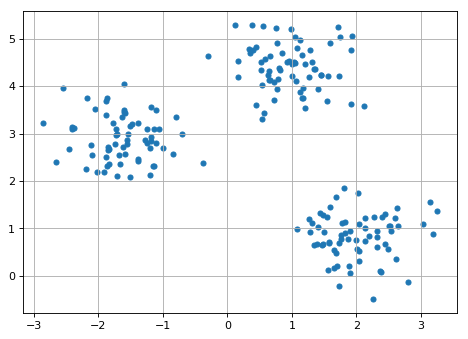

In [116]:
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(X[:,0], X[:,1], s=20)
plt.grid()

In [117]:
kmeans = KMeans(n_clusters=3,init='random', random_state=0)
y_pred = kmeans.fit_predict(X)

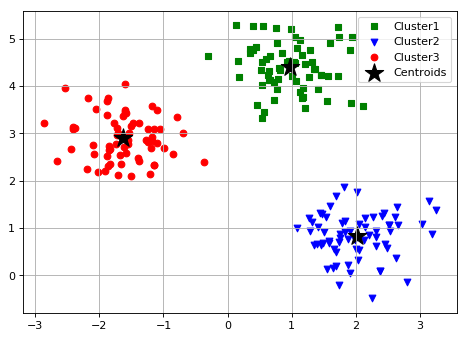

In [118]:
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(X[y_pred==0,0], X[y_pred==0,1],c='g', label='Cluster1', marker='s')
plt.scatter(X[y_pred==1,0], X[y_pred==1,1],c='b', label='Cluster2',marker='v')
plt.scatter(X[y_pred==2,0], X[y_pred==2,1],c='r', label='Cluster3',marker='o')
#plt.scatter(X[y_pred==3,0], X[y_pred==3,1],c='y', label='Cluster3',marker='+')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='k', marker='*', label='Centroids')
plt.legend()
plt.grid()

In [119]:
kmeans.inertia_

93.99874702328013

Text(0, 0.5, 'Inertia')

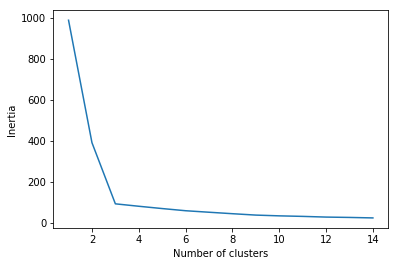

In [120]:
km = [KMeans(n_clusters=i, random_state=0).fit(X).inertia_ for i in range(1,15)]
plt.plot(range(1,15), km)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

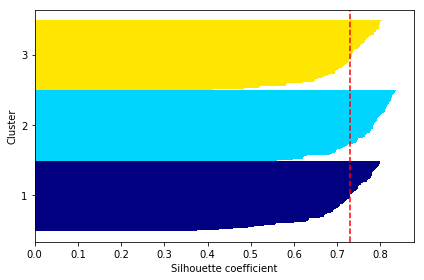

In [121]:
cluster_labels = np.unique(y_pred)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_pred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred == c]
    #print(c_silhouette_vals)
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

In [140]:
kmeans_2 = KMeans(n_clusters=2,init='random', random_state=0).fit(X)
y_pred_2 = kmeans_2.predict(X)

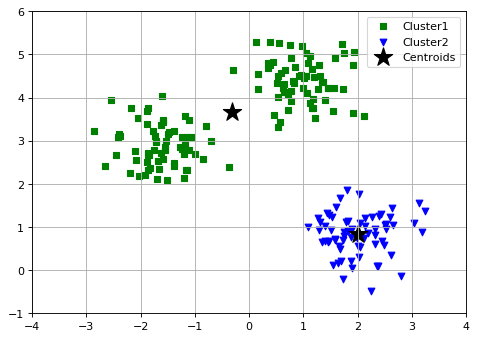

In [141]:
plt.figure(figsize=(7, 5), dpi=80)
plt.axis([-4, 4, -1, 6])
plt.scatter(X[y_pred_2==0,0], X[y_pred_2==0,1],c='g', label='Cluster1', marker='s')
plt.scatter(X[y_pred_2==1,0], X[y_pred_2==1,1],c='b', label='Cluster2',marker='v')
#plt.scatter(X[y_pred==2,0], X[y_pred==2,1],c='r', label='Cluster3',marker='o')
#plt.scatter(X[y_pred==3,0], X[y_pred==3,1],c='y', label='Cluster3',marker='+')
plt.scatter(kmeans_2.cluster_centers_[:,0],kmeans_2.cluster_centers_[:,1],s=300, c='k', marker='*', label='Centroids')
plt.legend()
plt.grid()

Text(0.5, 0, 'Silhouette coefficient')

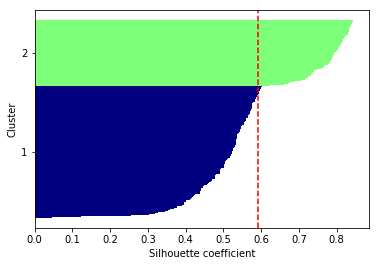

In [142]:
cluster_labels = np.unique(y_pred_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_pred_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')